Searches: DynestyStatic
=======================

This example illustrates how to use the nested sampling algorithm DynestyStatic.

Information about Dynesty can be found at the following links:

 - https://github.com/joshspeagle/dynesty
 - https://dynesty.readthedocs.io/en/latest/

In [1]:
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

import autofit as af
import model as m
import analysis as a

import matplotlib.pyplot as plt
import numpy as np
from os import path

/mnt/c/Users/Jammy/Code/PyAuto/autofit_workspace
Working Directory has been set to `/mnt/c/Users/Jammy/Code/PyAuto/autofit_workspace`


__Data__

This example fits a single 1D Gaussian, we therefore load and plot data containing one Gaussian.

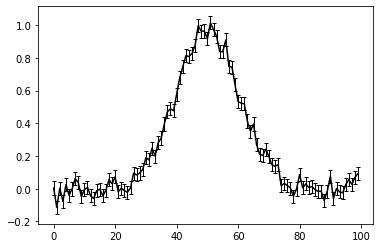

In [2]:
dataset_path = path.join("dataset", "example_1d", "gaussian_x1")
data = af.util.numpy_array_from_json(file_path=path.join(dataset_path, "data.json"))
noise_map = af.util.numpy_array_from_json(
    file_path=path.join(dataset_path, "noise_map.json")
)

plt.errorbar(
    x=range(data.shape[0]),
    y=data,
    yerr=noise_map,
    color="k",
    ecolor="k",
    elinewidth=1,
    capsize=2,
)
plt.show()
plt.close()

__Model + Analysis__

We create the model and analysis, which in this example is a single `Gaussian` and therefore has dimensionality N=3.

In [3]:
model = af.Model(m.Gaussian)

model.centre = af.UniformPrior(lower_limit=0.0, upper_limit=100.0)
model.intensity = af.LogUniformPrior(lower_limit=1e-2, upper_limit=1e2)
model.sigma = af.UniformPrior(lower_limit=0.0, upper_limit=30.0)

analysis = a.Analysis(data=data, noise_map=noise_map)

__Search__

We now create and run the `DynestyStatic` object which acts as our non-linear search. 

We manually specify all of the Dynesty settings, descriptions of which are provided at the following webpage:

 https://dynesty.readthedocs.io/en/latest/api.html
 https://dynesty.readthedocs.io/en/latest/api.html#module-dynesty.nestedsamplers

2021-05-10 10:18:30,001 - root - INFO - Generating initial samples of model, which are subject to prior limits and other constraints.
2021-05-10 10:18:30,013 - root - INFO - No Dynesty samples found, beginning new non-linear search. 
255it [00:01, 202.79it/s, +50 | bound: 7 | nc: 1 | ncall: 2553 | eff(%): 11.947 | loglstar:   -inf < -103.427 <    inf | logz: -113.101 +/-  0.668 | dlogz:  1.099 >  0.059]
2021-05-10 10:18:31,331 - root - INFO - 2500 Iterations: Performing update (Visualization, outputting samples, etc.).
804it [00:03, 214.57it/s, +50 | bound: 37 | nc: 1 | ncall: 5064 | eff(%): 16.864 | loglstar:   -inf < -54.532 <    inf | logz: -71.009 +/-  0.827 | dlogz:  0.034 >  0.059]
2021-05-10 10:18:35,399 - root - INFO - 5000 Iterations: Performing update (Visualization, outputting samples, etc.).
981it [00:02, 349.71it/s, +50 | bound: 54 | nc: 1 | ncall: 6408 | eff(%): 16.089 | loglstar:   -inf < -54.382 <    inf | logz: -70.946 +/-  0.770 | dlogz:  0.001 >  0.059]
2021-05-10 10

<Figure size 432x288 with 0 Axes>

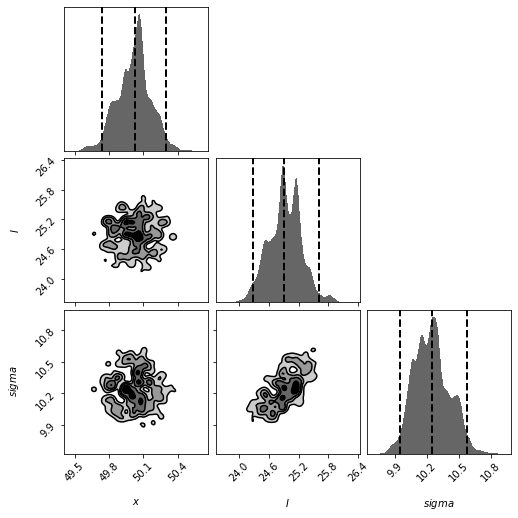

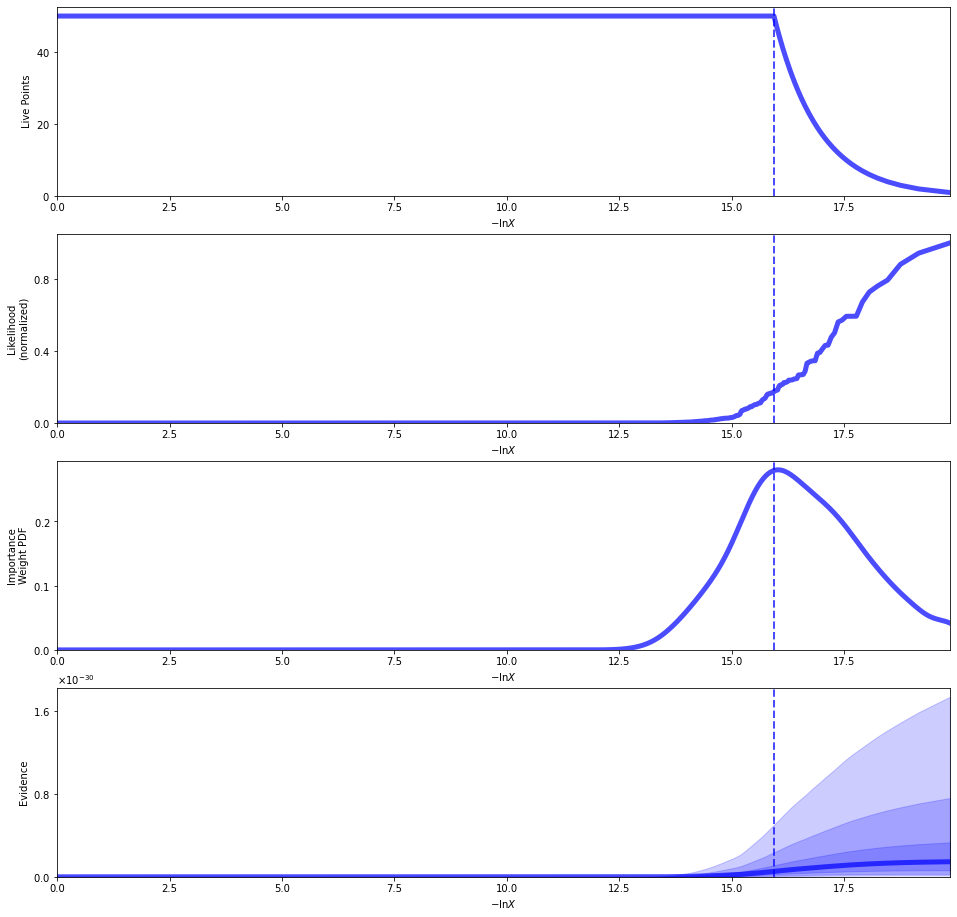

<Figure size 864x648 with 0 Axes>

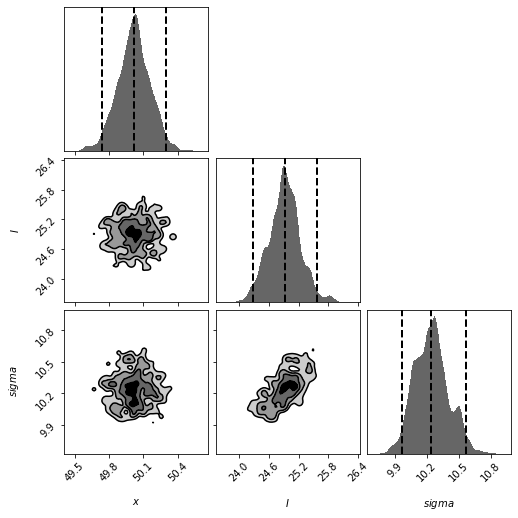

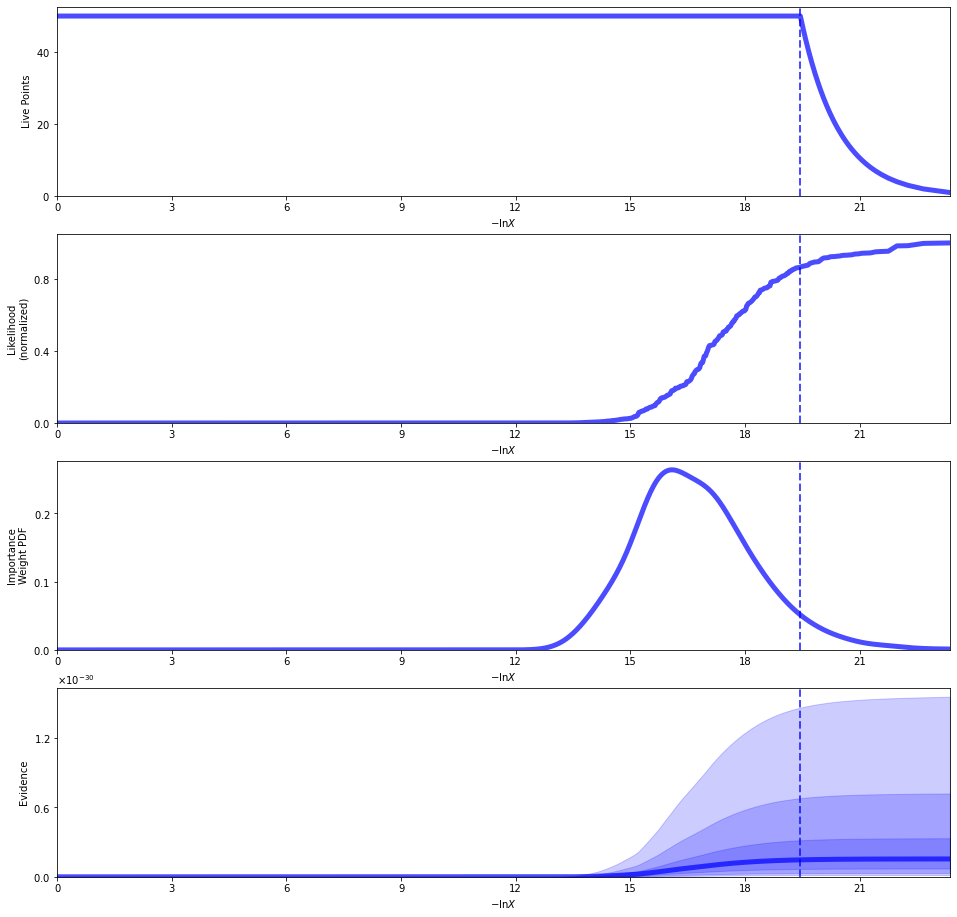

<Figure size 864x648 with 0 Axes>

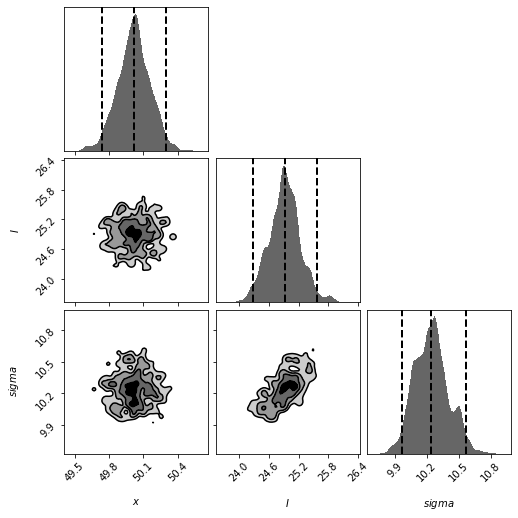

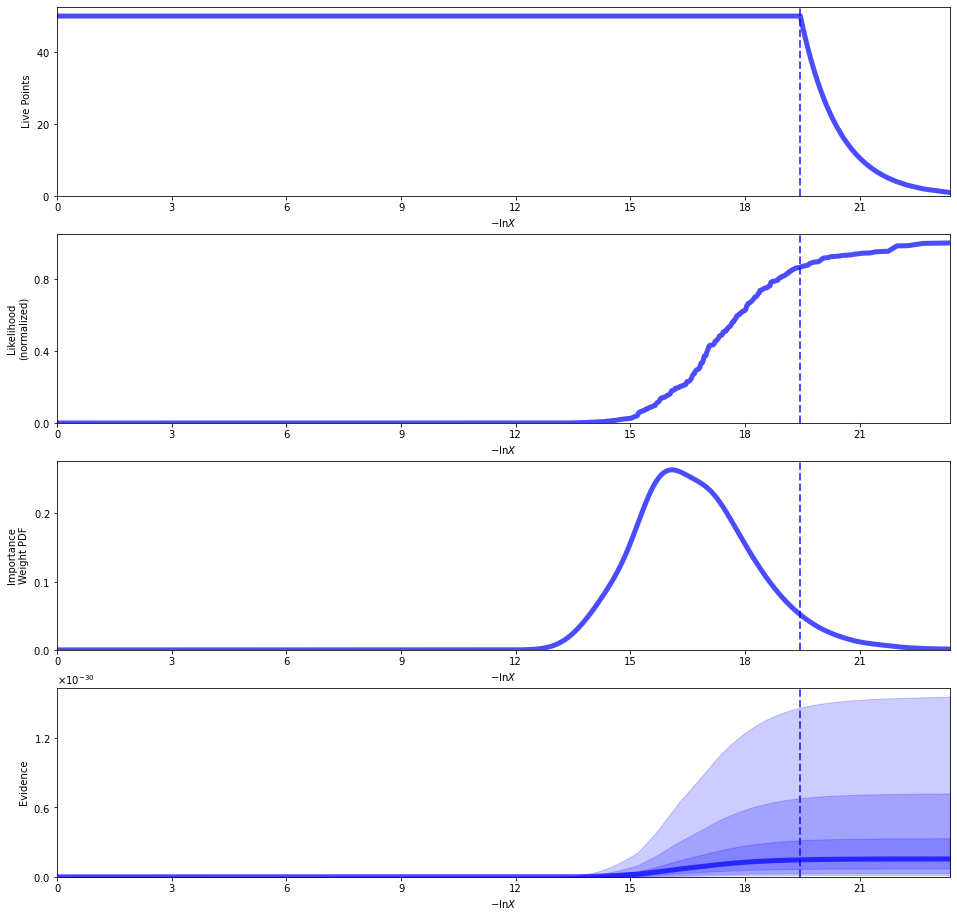

<Figure size 864x648 with 0 Axes>

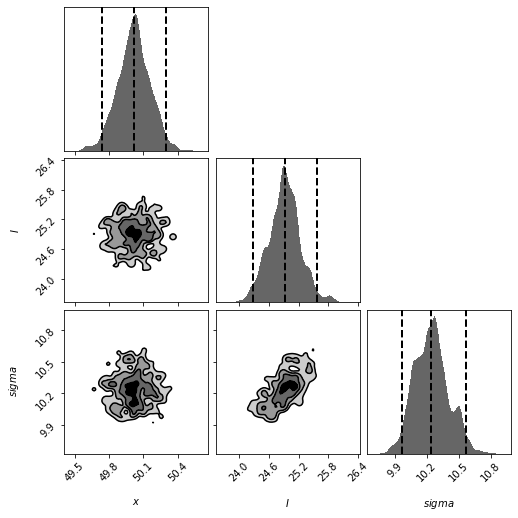

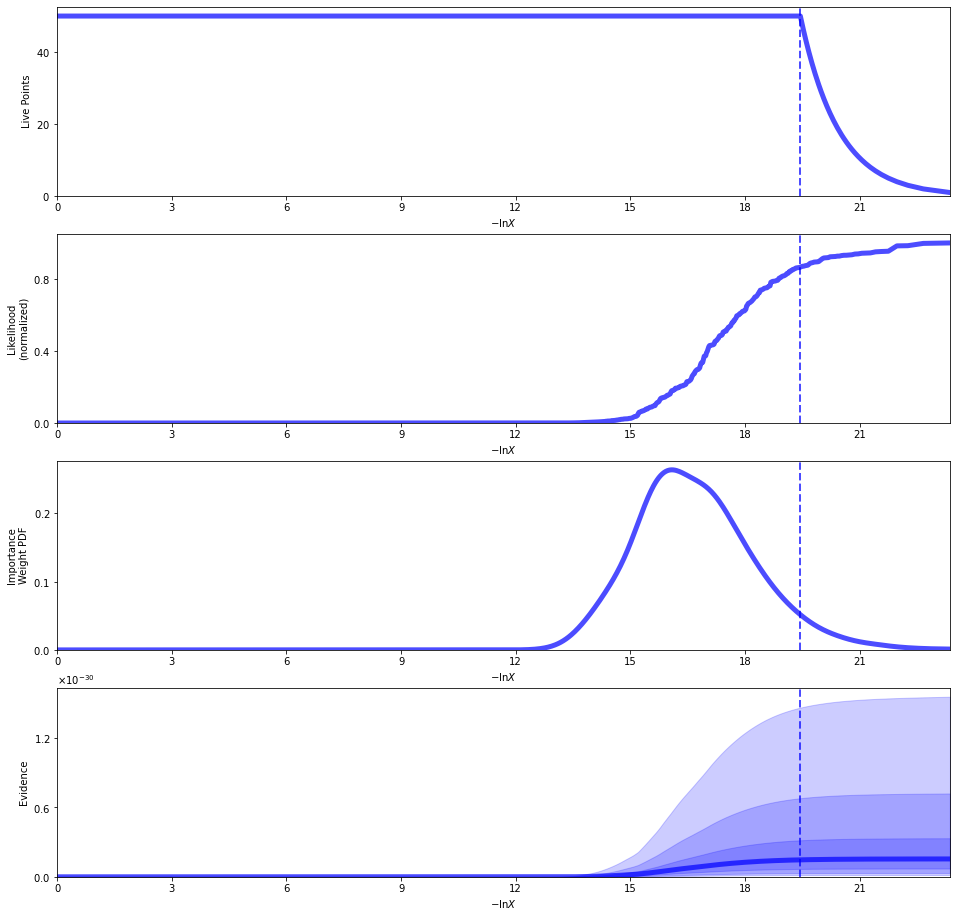

<Figure size 864x648 with 0 Axes>

In [4]:
dynesty = af.DynestyStatic(
    path_prefix="searches",
    name="DynestyStatic2",
    nlive=50,
    bound="multi",
    sample="auto",
    bootstrap=None,
    enlarge=None,
    update_interval=None,
    vol_dec=0.5,
    vol_check=2.0,
    walks=25,
    facc=0.5,
    slices=5,
    fmove=0.9,
    max_move=100,
    iterations_per_update=2500,
    number_of_cores=1,
)

result = dynesty.fit(model=model, analysis=analysis)

__Result__

The result object returned by the fit provides information on the results of the non-linear search. Lets use it to
compare the maximum log likelihood `Gaussian` to the data.

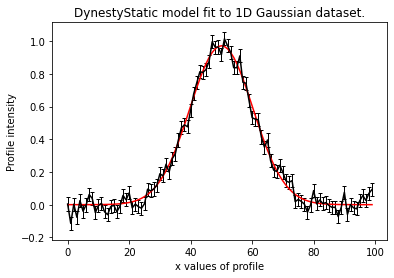

In [5]:
model_data = result.max_log_likelihood_instance.profile_from_xvalues(
    xvalues=np.arange(data.shape[0])
)

plt.errorbar(
    x=range(data.shape[0]),
    y=data,
    yerr=noise_map,
    color="k",
    ecolor="k",
    elinewidth=1,
    capsize=2,
)
plt.plot(range(data.shape[0]), model_data, color="r")
plt.title("DynestyStatic model fit to 1D Gaussian dataset.")
plt.xlabel("x values of profile")
plt.ylabel("Profile intensity")
plt.show()
plt.close()
